In [2]:
# importing libraries that will be used 
#importing pandas to work with our data
import pandas as pd 
#Matplotlib to plot charts
from matplotlib import pyplot as plt
# works with arrays
import numpy as np 
#import the visualization for the worldcloud
from wordcloud import WordCloud
#importing datetime
from datetime import datetime
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ali
[nltk_data]     Shahrour\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df= pd.read_csv("Final.csv")
df.head()

,Unnamed: 0,Incedents,Date,Time,Location,Operator,Route,AC Type,Registration,cn / In,Aboard,Death,Ground,Summary
0,0,1,17-Sep-08,5:18 PM,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,SC-1,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fl..."
1,1,2,09-Jul-09,10:00 AM,"Juvisy-sur-Orge, France",\tEugene Lefebvre,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever b...
2,2,3,07-Dec-12,6:30 AM,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0.0,First U.S. dirigible Akron exploded just offs...
3,3,4,08-Jun-13,NaN,"Victoria, British Columbia, Canada",Private,Victoria,Curtiss seaplane,NaN,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0.0,The first fatal airplane accident in Canada o...
4,4,5,09-Sep-13,6:30 PM,Over the North Sea,Military - German Navy,"Berlin,Johannisthal",Zeppelin L-1 (airship),NaN,NaN,20 (passengers:? crew:?),14 (passengers:? crew:?),0.0,The airship flew into a thunderstorm and enco...


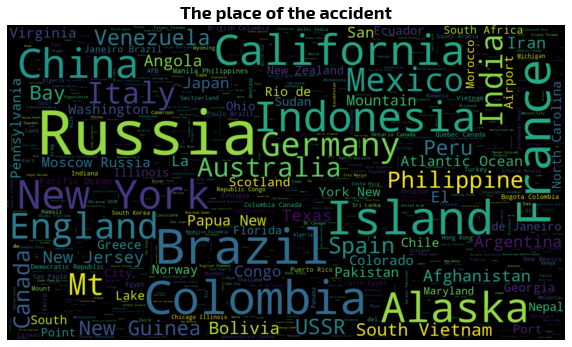

In [3]:
from PIL import Image #using this so i can import the image from my workspace
#stopwords is used to ignore words such as (or,and,in)
stopwords = nltk.corpus.stopwords.words('english')
# importing a transparent picture so there can be more space
globe_mask = np.array(Image.open('airplane.jpg'))

# setting location to a list
text = str(df.Location.tolist())
# adding the word near to stopwords 
stopwords = set(stopwords)
stopwords.add('Near')
stopwords.add('East')
stopwords.add('West')

# designing the worldcloud,  
wc = WordCloud(max_words=2000, mask=globe_mask,stopwords=stopwords)
wc.generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
# removes the axis such as the numbers on left and right side
plt.axis("off")
plt.title('The place of the accident',fontname = 'Exo 2',weight="bold",fontsize=18)
plt.show()

In [4]:
print(len(text))

134239


In [5]:
print(len(stopwords))

182


In [6]:
df.head(2)

,Unnamed: 0,Incedents,Date,Time,Location,Operator,Route,AC Type,Registration,cn / In,Aboard,Death,Ground,Summary
0,0,1,17-Sep-08,5:18 PM,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,SC-1,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fl..."
1,1,2,09-Jul-09,10:00 AM,"Juvisy-sur-Orge, France",\tEugene Lefebvre,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever b...


In [7]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df.head(2)

,Unnamed: 0,Incedents,Date,Time,Location,Operator,Route,AC Type,Registration,cn / In,Aboard,Death,Ground,Summary,Month
0,0,1,2008-09-17,5:18 PM,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,SC-1,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fl...",9
1,1,2,2009-07-09,10:00 AM,"Juvisy-sur-Orge, France",\tEugene Lefebvre,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever b...,7


In [8]:
import calendar
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [12]:
df.head()

,Unnamed: 0,Incedents,Date,Time,Location,Operator,Route,AC Type,Registration,cn / In,Aboard,Death,Ground,Summary,Month
0,0,1,2008-09-17,5:18 PM,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,SC-1,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fl...",Sep
1,1,2,2009-07-09,10:00 AM,"Juvisy-sur-Orge, France",\tEugene Lefebvre,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever b...,Jul
2,2,3,2012-12-07,6:30 AM,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0.0,First U.S. dirigible Akron exploded just offs...,Dec
3,3,4,2013-06-08,NaN,"Victoria, British Columbia, Canada",Private,Victoria,Curtiss seaplane,NaN,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0.0,The first fatal airplane accident in Canada o...,Jun
4,4,5,2013-09-09,6:30 PM,Over the North Sea,Military - German Navy,"Berlin,Johannisthal",Zeppelin L-1 (airship),NaN,NaN,20 (passengers:? crew:?),14 (passengers:? crew:?),0.0,The airship flew into a thunderstorm and enco...,Sep


In [10]:
df2 = df.groupby(['Month'])['Month'].count()
print(df2)

Month
Apr    369
Aug    461
Dec    474
Feb    365
Jan    451
Jul    412
Jun    381
Mar    429
May    360
Nov    462
Oct    424
Sep    426
Name: Month, dtype: int64


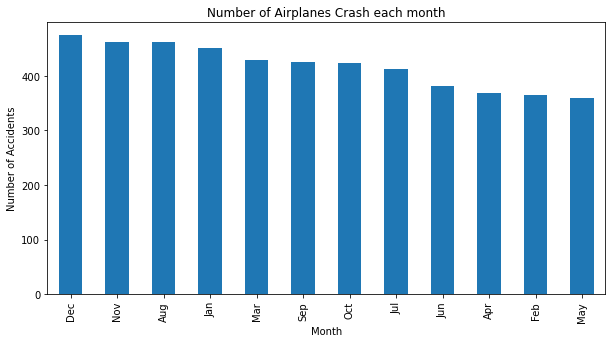

In [13]:
# creating a Histogram to compare different months of a crash 
df.Month.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of Airplanes Crash each month")
plt.ylabel('Number of Accidents')
plt.xlabel('Month');

In [5]:
df.dtypes

Unnamed: 0        int64
Incedents         int64
Date             object
Time             object
Location         object
Operator         object
Route            object
AC Type          object
Registration     object
cn / In          object
Aboard           object
Death            object
Ground          float64
Summary          object
dtype: object

In [6]:
df

,Unnamed: 0,Incedents,Date,Time,Location,Operator,Route,AC Type,Registration,cn / In,Aboard,Death,Ground,Summary
0,0,1,17-Sep-08,5:18 PM,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,SC-1,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fl..."
1,1,2,09-Jul-09,10:00 AM,"Juvisy-sur-Orge, France",\tEugene Lefebvre,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever b...
2,2,3,07-Dec-12,6:30 AM,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0.0,First U.S. dirigible Akron exploded just offs...
3,3,4,08-Jun-13,NaN,"Victoria, British Columbia, Canada",Private,Victoria,Curtiss seaplane,NaN,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0.0,The first fatal airplane accident in Canada o...
4,4,5,09-Sep-13,6:30 PM,Over the North Sea,Military - German Navy,"Berlin,Johannisthal",Zeppelin L-1 (airship),NaN,NaN,20 (passengers:? crew:?),14 (passengers:? crew:?),0.0,The airship flew into a thunderstorm and enco...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5009,5009,5010,06-Oct-21,8:00 AM,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14 (passengers:12 crew:2),12 (passengers:11 crew:1),0.0,The plane was carrying military personnel and...
5010,5010,5011,07-Apr-21,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96 (passengers:88 crew:8),50 (passengers:? crew:?),3.0,"While attempting to land at Jolo Airport, the..."
5011,5011,5012,07-Jun-21,3:00 PM,"Palana, Russia",Kamchatka Aviation Enterprise,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28 (passengers:22 crew:6),28 (passengers:22 crew:6),0.0,The passenger plane crashed into the top of a...
5012,5012,5013,09-Dec-21,11:15 PM,"Kazachinskoye , Russia",Aeroservice/SiLA,Irkutsk - Kazachinskoye,Let L-410UVP-E20,RA-67042,2916,16 (passengers:14 crew:2),4 (passengers:3 crew:1),0.0,The aircraft was on it's second approach in h...
